In [1]:
my.data <- read.table (file="gene_expression_n438x978.txt", sep="\t", header=T)

In [2]:
my.data[101:103, 99:108]

,NFKBIA,NFKBIE,CCNH,HMGA2,IGFBP3,FRS2,IFNAR1,MIF,DAG1,IGF2BP2
101,-0.03166169,0.01705320,-0.0142124559,-0.015272992,-0.013694120,0.005602638,-0.01008991,-0.0046241784,0.008164756,-0.0250272780
102,-0.03097310,0.03440224,0.0025100599,-0.020967721,0.005700945,-0.004132518,0.02691253,-0.0001289621,0.003634794,-0.0093396800
103,0.01155199,0.01973762,-0.0004149873,-0.001304998,-0.006642021,-0.034261456,-0.02221253,-0.0294397350,0.018621010,0.0007113519


In [3]:
dimnames(my.data)[[1]] <- my.data[, 1]
my.data <- my.data[, -1]

In [4]:
my.data[1:5, 'PSME1']

[1] -0.015159099 -0.026811981  0.001017958 -0.004398264  0.001838965

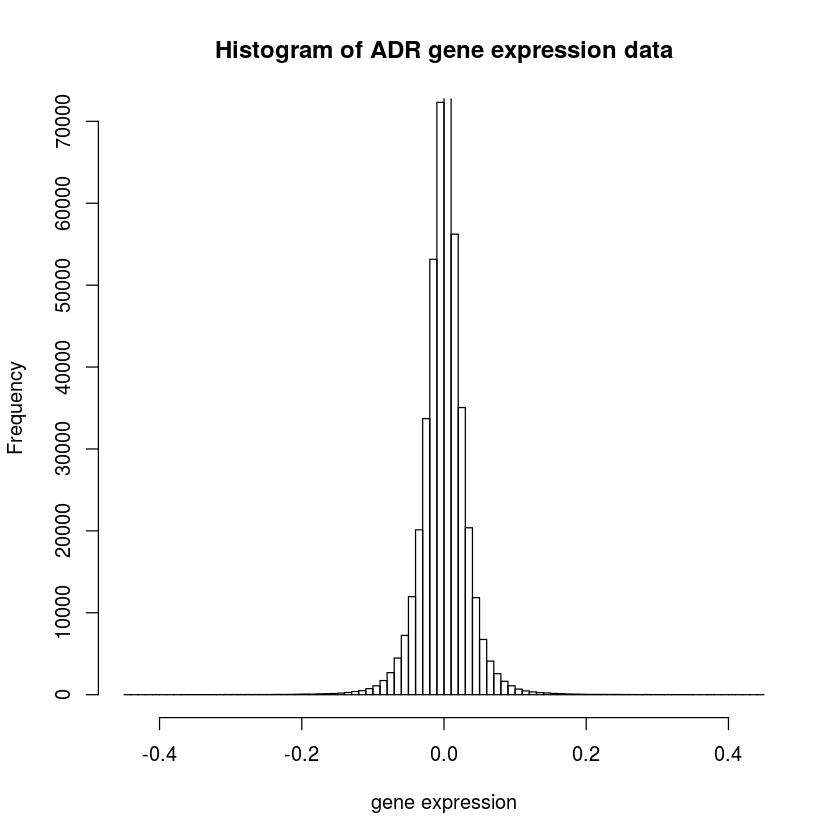

In [5]:
hist (as.vector(unlist(my.data)), nclass=100, xlab="gene expression", main="Histogram of ADR gene expression data", 
      ylim=c(1,70000))

In [6]:
which (dimnames(my.data)[[2]] == "ATF1")

[1] 2

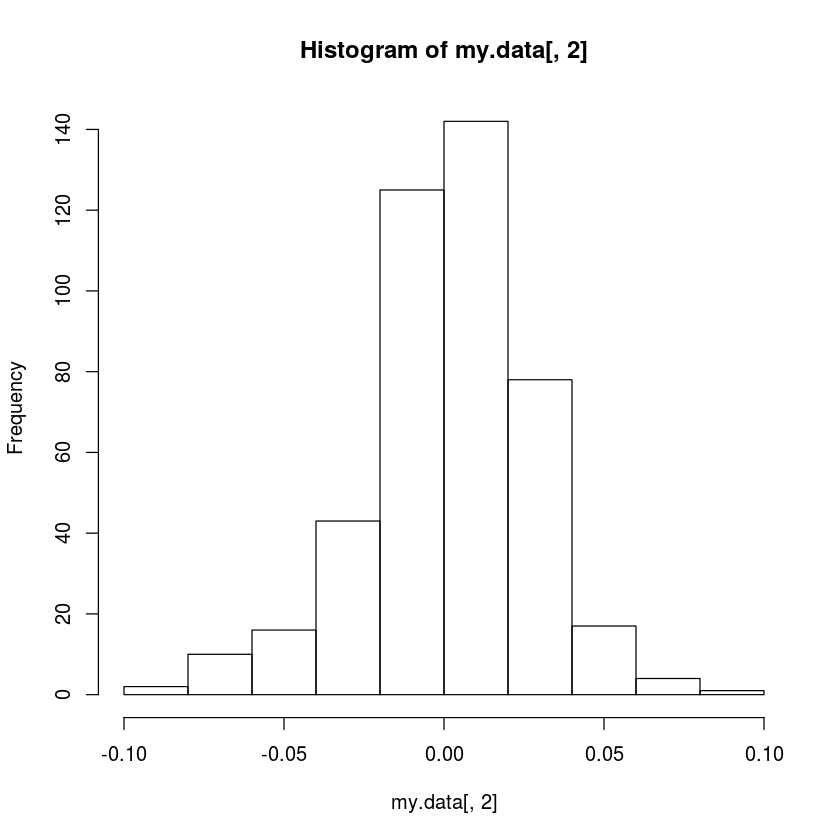

In [7]:
hist (my.data[, 2])

In [8]:
max(my.data)
min (my.data)
mean (as.vector(unlist(my.data)))
median (as.vector(unlist(my.data)))

[1] 0.4449588

[1] -0.4458918

[1] 1.091541e-17

[1] 0.0003589745

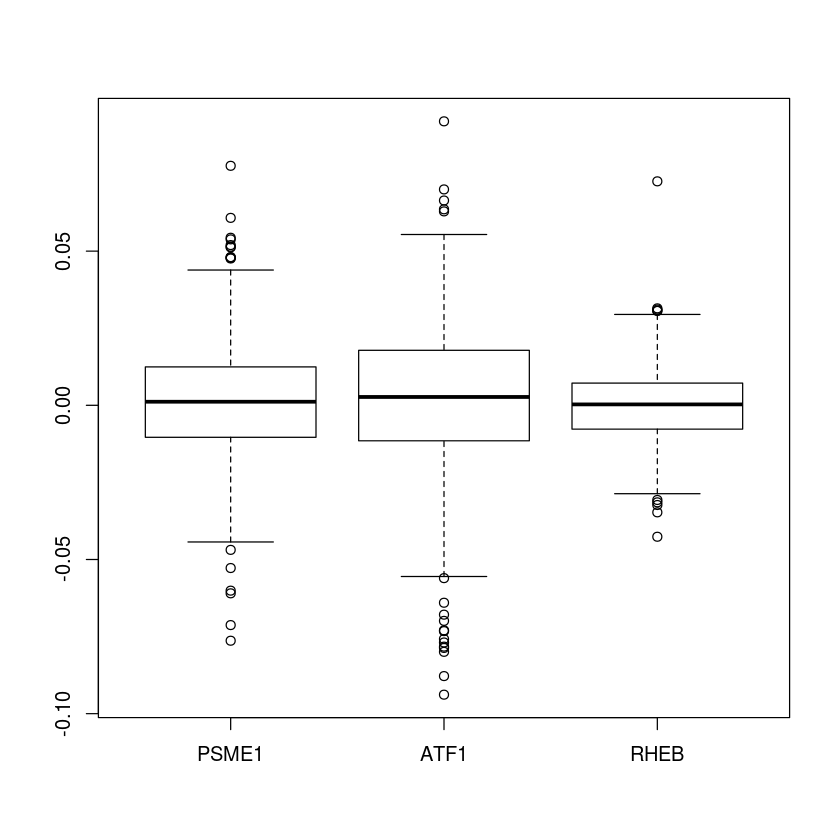

In [9]:
boxplot (my.data[, 1:3])

In [10]:
x <- c(1, 0, -1, 0)
z <- c(-1, 0, 1, 0)
cor(x,z)

[1] -1

In [11]:
cor (my.data[,1], my.data[, 2])

[1] 0.02669966

3. Pairwis correlation

Your task 1: What is the maximum correlation coefficient among all possible pairs of genes? How about the minimum correlation?

_Q:_ Can you get away from doing a double nested loop in R? Discuss with your neighbors.

Note that the total number of possible gene pairs = 978*977/2 = 477,753

Your task 2: write a R script. For computationally intensive tasks, you might want to consider running your R code in batch mode. https://www.r-bloggers.com/batch-processing-vs-interactive-sessions/

Hint: There are many ways to do this. You can use a loop or you might want to check out http://www.r-bloggers.com/using-apply-sapply-lapply-in-r/


In [12]:
curr.max <- -1
curr.min <- 1
for (i in 1:ncol(my.data)) {
    #for (j in (i+1):ncol(my.data)) {
        # ret.cor <- cor (my.data[, i], my.data[,j])
        ret.cor <- apply (my.data[, -i], 2, function (x){cor(my.data[,i], x)})
        curr.max <- max(c(curr.max, ret.cor))
        curr.min <- min(c(curr.min, ret.cor))
   # }
}
print (paste("curr max = ", curr.max, sep=""))
print (paste("curr min = ", curr.min, sep=""))

[1] "curr max = 0.52272128511618"
[1] "curr min = -0.765502866721526"


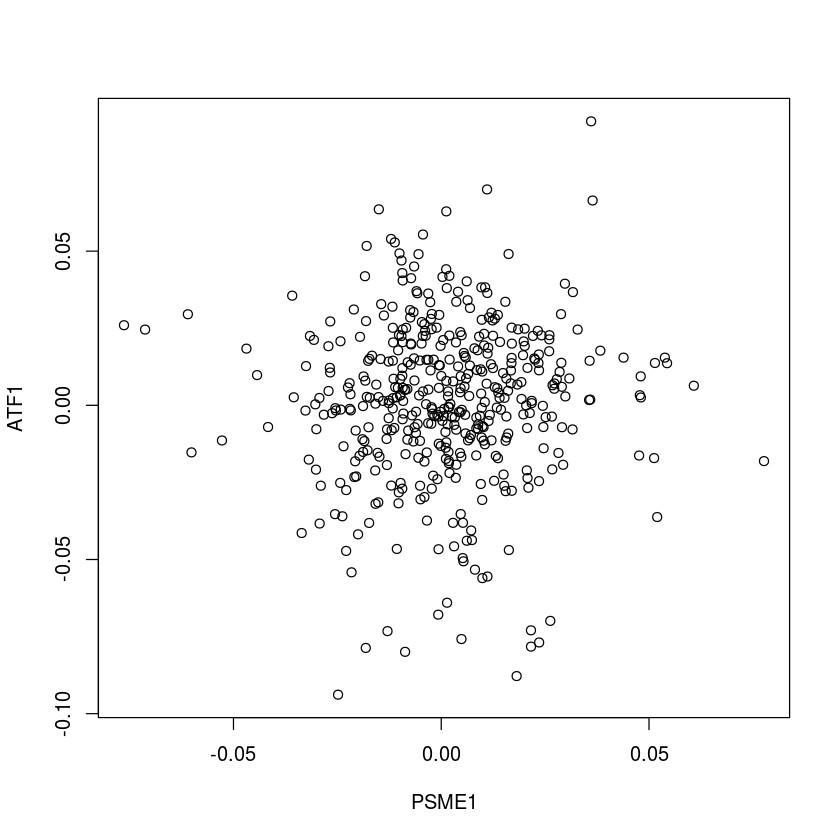

In [13]:
plot (my.data[,1], my.data[,2], xlab="PSME1", ylab="ATF1")

In [14]:
cor (my.data$UBE2C, my.data$CDK1)

[1] 0.5227213

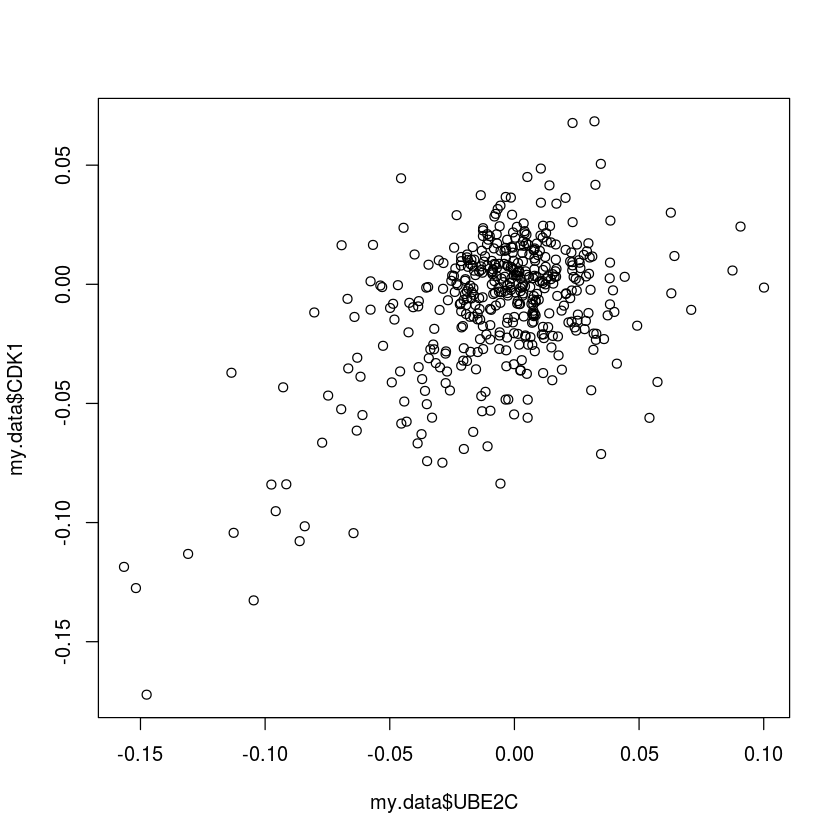

In [15]:
plot (my.data$UBE2C, my.data$CDK1)

# Linear Regression

In [16]:
lmFit1 <- lm(my.data$CDK1 ~ my.data$UBE2C)
summary (lmFit1)


Call:
lm(formula = my.data$CDK1 ~ my.data$UBE2C)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.096025 -0.014247  0.003149  0.017000  0.071622 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)   -0.005261   0.001214  -4.336 1.81e-05 ***
my.data$UBE2C  0.480930   0.037563  12.803  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.02491 on 436 degrees of freedom
Multiple R-squared:  0.2732,	Adjusted R-squared:  0.2716 
F-statistic: 163.9 on 1 and 436 DF,  p-value: < 2.2e-16


In [17]:
lmFit2 <- lm(my.data$CDK1 ~ my.data$UBE2C + my.data$ATF1 + my.data$RHOA)
summary (lmFit2)


Call:
lm(formula = my.data$CDK1 ~ my.data$UBE2C + my.data$ATF1 + my.data$RHOA)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.095512 -0.014494  0.003057  0.016405  0.067388 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)   -0.005638   0.001208  -4.666 4.10e-06 ***
my.data$UBE2C  0.465947   0.037439  12.446  < 2e-16 ***
my.data$ATF1   0.187601   0.045325   4.139 4.19e-05 ***
my.data$RHOA   0.004271   0.051644   0.083    0.934    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.02449 on 434 degrees of freedom
Multiple R-squared:  0.3008,	Adjusted R-squared:  0.296 
F-statistic: 62.25 on 3 and 434 DF,  p-value: < 2.2e-16


In [18]:
lmFit3 <- lm(my.data$CDK1 ~ my.data$UBE2C + my.data$ATF1 + my.data$RHOA + my.data$CBR3)
summary (lmFit3)


Call:
lm(formula = my.data$CDK1 ~ my.data$UBE2C + my.data$ATF1 + my.data$RHOA + 
    my.data$CBR3)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.09455 -0.01393  0.00245  0.01643  0.06785 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)   -0.005879   0.001220  -4.820 1.99e-06 ***
my.data$UBE2C  0.469924   0.037510  12.528  < 2e-16 ***
my.data$ATF1   0.183903   0.045356   4.055 5.95e-05 ***
my.data$RHOA   0.002029   0.051616   0.039    0.969    
my.data$CBR3  -0.043511   0.031475  -1.382    0.168    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.02446 on 433 degrees of freedom
Multiple R-squared:  0.3039,	Adjusted R-squared:  0.2975 
F-statistic: 47.26 on 4 and 433 DF,  p-value: < 2.2e-16


In [19]:
coefficients (lmFit1)

(Intercept) my.data$UBE2C 
 -0.005261415   0.480930215

In [20]:
coefficients (lmFit1)[1]

(Intercept) 
-0.005261415

In [21]:
coefficients (lmFit1)[2]

my.data$UBE2C 
    0.4809302

In [22]:
predict.lmFit1 <- predict (lmFit1)
predict.lmFit1

1             2             3             4             5 
-7.773099e-03 -1.511643e-02 -1.726771e-02  1.036767e-02 -1.170592e-02 
            6             7             8             9            10 
-1.266865e-03 -1.436746e-02 -6.542832e-03 -6.853536e-03 -1.305685e-02 
           11            12            13            14            15 
 5.797723e-03  6.892715e-03 -7.054738e-03 -2.452015e-02 -4.571061e-02 
           16            17            18            19            20 
-2.216179e-02 -9.346294e-03 -9.623844e-03  6.564038e-03 -1.154769e-02 
           21            22            23            24            25 
-5.930274e-03 -1.133412e-02 -1.553733e-02 -2.191097e-02 -2.219491e-03 
           26            27            28            29            30 
-1.178123e-03 -6.153621e-03 -1.915419e-02 -3.254498e-02 -1.047793e-02 
           31            32            33            34            35 
 3.835392e-02 -1.479730e-02 -4.768922e-03  6.651921e-03 -8.945497e-03 
           36            37            38            39            40 
-1.808617e-02 -1.093341e-02 -6.478671e-03 -1.621136e-02  9.011081e-03 
           41            42            43            44            45 
 1.053750e-02 -8.658863e-03  6.352742e-03 -5.942501e-02  9.258221e-03 
           46            47            48            49            50 
-7.139469e-03 -4.783296e-03 -3.457690e-02  7.193972e-03  1.497348e-03 
           51            52            53            54            55 
-3.611716e-02 -8.171480e-03 -9.922407e-03 -2.866353e-02 -6.822604e-03 
           56            57            58            59            60 
 3.491613e-04  3.081921e-05 -1.165397e-02 -3.616732e-04 -7.621137e-02 
           61            62            63            64            65 
 2.491089e-02  1.202058e-02  1.325298e-02 -2.115354e-02  1.980894e-04 
           66            67            68            69            70 
-1.130355e-02 -1.412276e-03  7.463779e-03  4.715335e-03 -8.603621e-03 
           71            72            73            74            75 
 2.771079e-04 -6.682935e-03 -1.389449e-03 -2.569148e-02 -6.858887e-03 
           76            77            78            79            80 
-9.002972e-03 -1.235288e-02  7.575787e-04 -9.918338e-03 -2.713245e-02 
           81            82            83            84            85 
-1.703324e-04  7.271027e-04 -1.518612e-04 -1.266952e-02  2.597634e-04 
           86            87            88            89            90 
-1.559350e-02 -2.226990e-02 -1.501623e-02 -1.384602e-02  5.770644e-03 
           91            92            93            94            95 
-5.522463e-03 -1.563366e-02 -5.938844e-03 -6.966740e-03  5.951306e-03 
           96            97            98            99           100 
-1.546448e-02 -1.520434e-02 -2.993233e-03 -3.310648e-03 -8.243558e-03 
          101           102           103           104           105 
-2.042576e-02 -8.878847e-03  1.226660e-03  3.680773e-02  8.278660e-03 
          106           107           108           109           110 
 9.759092e-03 -3.301246e-02 -1.826103e-02  9.550010e-03 -5.993198e-03 
          111           112           113           114           115 
-4.805101e-03 -5.280042e-03 -8.679722e-03 -1.233714e-02 -3.860128e-02 
          116           117           118           119           120 
-5.753567e-04  1.455275e-03 -4.377527e-03  6.986660e-03  1.949836e-04 
          121           122           123           124           125 
-2.840914e-02  6.162617e-03 -8.122125e-03 -1.328461e-03  1.272742e-02 
          126           127           128           129           130 
-1.551909e-02 -1.316418e-02 -5.365385e-03  1.145631e-02  5.509241e-04 
          131           132           133           134           135 
-1.084498e-02 -5.214993e-02 -1.377324e-02 -1.816516e-03 -1.162339e-03 
          136           137           138           139           140 
 1.339928e-04 -1.318613e-02  1.317902e-02  1.775689e-03 -1.985430e-02 
          141           142         